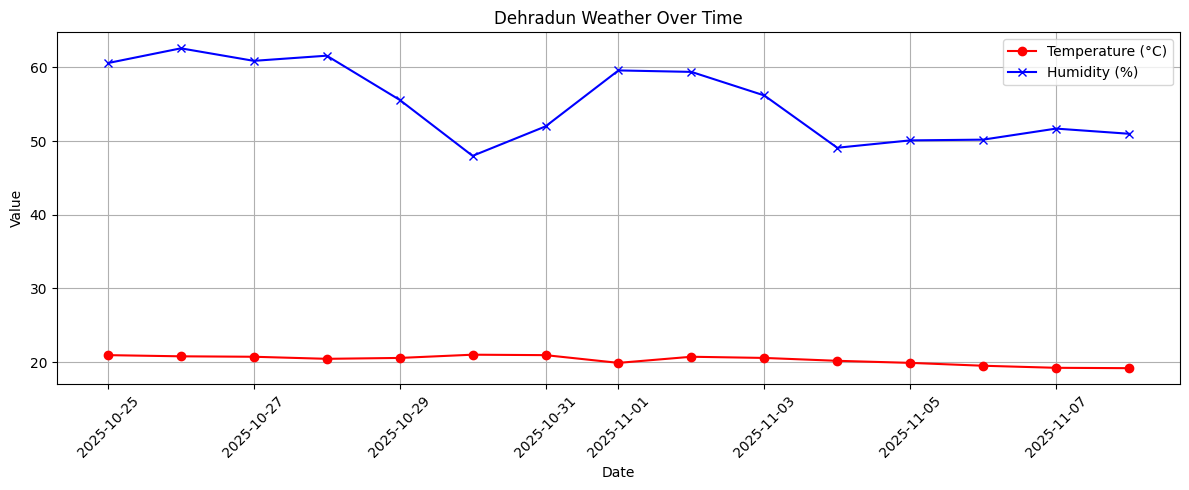

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dehradun_weather_processed.csv", sep=",")
df.columns = df.columns.str.strip() 
dates = pd.to_datetime(df["date"])

temperature = df["temperature_celsius"].tolist()
humidity = df["humidity"].tolist()
wind = df["wind_kph"].tolist()

plt.figure(figsize=(12,5))
plt.plot(dates, temperature, label="Temperature (°C)", color="red", marker='o')
plt.plot(dates, humidity, label="Humidity (%)", color="blue", marker='x')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Dehradun Weather Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()


